##Upper Confidence Bound 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
class ucb_bandit:
    def __init__(self, k, c, iters, mu='random'):
        self.k = k
        # Exploration parameter
        self.c = c
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
        
    def pull(self):
        # Select action according to UCB Criteria
        a = np.argmax(self.k_reward + self.c * np.sqrt(
                (np.log(self.n)) / self.k_n))
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 1
        self.k_n = np.ones(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)
        if mu == 'random':
            self.mu = np.random.normal(0, 1, self.k)

In [2]:
k = 4 # number of arms
iters = 5000
ucb_rewards1 = np.zeros(iters)
ucb_rewards2 = np.zeros(iters)
ucb_rewards3 = np.zeros(iters)
ucb_rewards4 = np.zeros(iters)
ucb_rewards4 = np.zeros(iters)
ucb_rewards4 = np.zeros(iters)
# Initialize bandits

ucb1 = ucb_bandit(k, 0.01, iters)
ucb2 = ucb_bandit(k, 0.05, iters)
ucb3 = ucb_bandit(k, 0.07, iters)
ucb4 = ucb_bandit(k, 1, iters)
episodes = 1000
# Run experiments
for i in range(episodes): 
    ucb1.reset('random')
    ucb2.reset('random')
    ucb3.reset('random')
    ucb4.reset('random')
    # Run experiments
    ucb1.run()
    ucb2.run()
    ucb3.run()
    ucb4.run()
    
    # Update long-term averages
    ucb_rewards1 = ucb_rewards1 + (
        ucb1.reward - ucb_rewards1) / (i + 1)
    ucb_rewards2 = ucb_rewards2 + (
        ucb2.reward - ucb_rewards2) / (i + 1)
    ucb_rewards3 = ucb_rewards3 + (
        ucb3.reward - ucb_rewards3) / (i + 1)
    ucb_rewards4 = ucb_rewards4 + (
        ucb4.reward - ucb_rewards4) / (i + 1)

##ε-greedy

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
  
# Define Action class
class Actions:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0
  
  # Choose a random action
  def choose(self): 
    return np.random.randn() + self.m
  
  # Update the action-value estimate
  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x
  
  
def run_experiment(m1, m2, m3, eps, N):
      
  actions = [Actions(m1), Actions(m2), Actions(m3)]
  
  data = np.empty(N)
    
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([a.mean for a in actions])
    x = actions[j].choose()
    actions[j].update(x)
  
    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  
  return cumulative_average
  
  
if __name__ == '__main__':
      
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.01, 5000)
  c_2 = run_experiment(1.0, 2.0, 3.0, 0.05, 5000)
  c_3 = run_experiment(1.0, 2.0, 3.0, 0.07, 5000)
  c_4 = run_experiment(1.0, 2.0, 3.0, 0.1, 5000)

##Plots

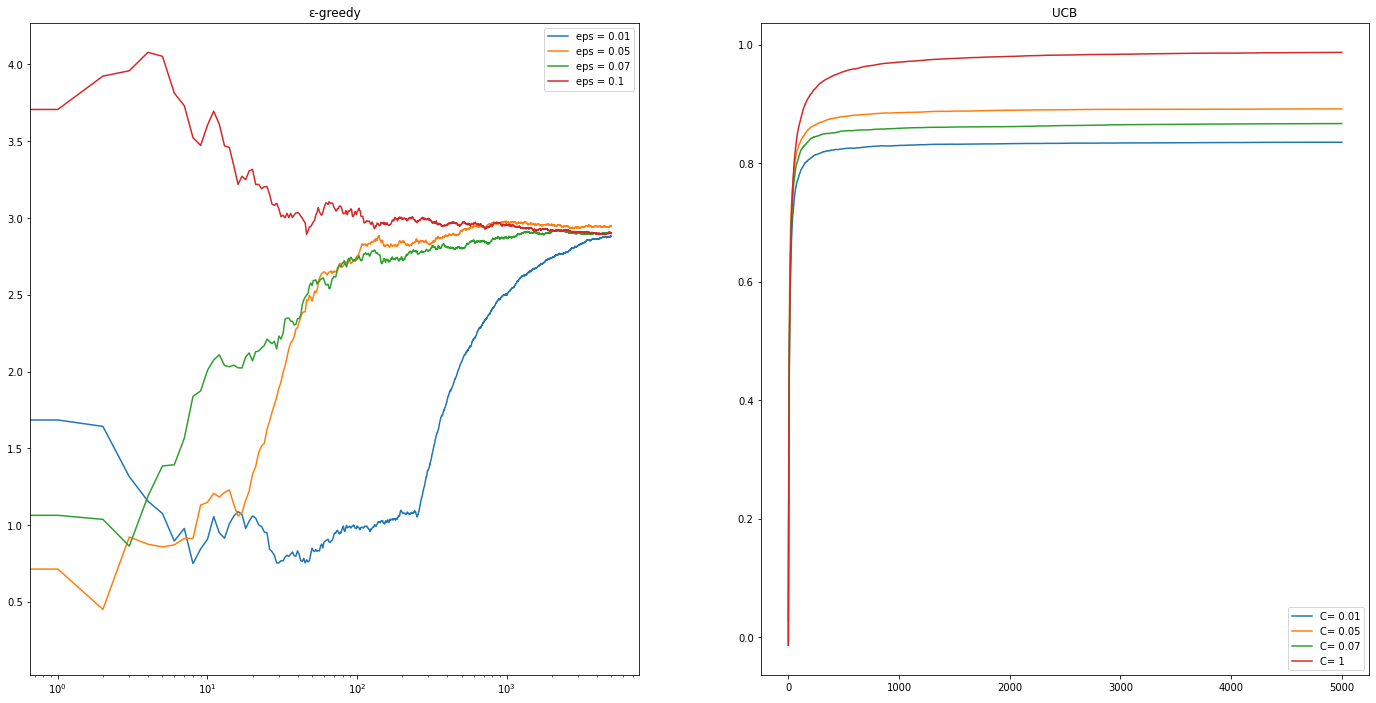

In [6]:
plt.figure(figsize=(24,12))
plt.subplot(1, 2, 1)
plt.plot(c_1, label ='eps = 0.01')
plt.plot(c_2, label ='eps = 0.05')
plt.plot(c_3, label ='eps = 0.07')
plt.plot(c_4, label ='eps = 0.1')
plt.legend()
plt.xscale('log')
plt.title("ε-greedy")

plt.subplot(1, 2, 2)
plt.plot(ucb_rewards1, label="C= 0.01")
plt.plot(ucb_rewards2, label="C= 0.05")
plt.plot(ucb_rewards3, label="C= 0.07")
plt.plot(ucb_rewards4, label="C= 1")
plt.legend()
plt.title("UCB")
plt.show()